Number of users = 943 | Number of movies = 1682
[[ 4.11644283  3.40891834  3.23624203 ...,  2.16171263  2.51624778
   2.02645422]
 [ 3.87501059  3.15389196  2.98477921 ...,  2.00009945  2.33926349
   1.95301269]
 [ 3.1140067   2.49959361  2.35953264 ...,  1.58523349  1.86122644
   1.59824421]
 ..., 
 [ 3.70305939  3.10635058  2.95575273 ...,  1.96976614  2.28478398
   1.79017494]
 [ 4.38558364  3.55081178  3.35719594 ...,  2.2518507   2.6375377
   2.22570605]
 [ 4.04686     3.20756157  3.02067842 ...,  2.03430674  2.3969967
   2.11067936]]


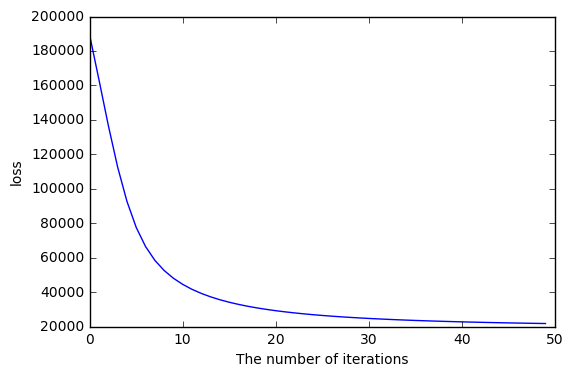

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
try:
    import numpy as np
except:
    print("This implementation requires the numpy module.")
    exit(0)

def get_data(filename):
    header = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv(filename, sep = '\t', names = header)
    n_users = df.user_id.unique().shape[0]
    n_items = df.item_id.unique().shape[0]
    print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))
    return df,n_users,n_items

"""    
    @INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
    
def loss(R, P, Q, K, beta=0.02):
    Q = Q.T
    e = 0
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                for k in range(K):
                    e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
    return e

def matrix_factorization(R, P, Q, K, alpha=0.0002, beta=0.02):
    Q = Q.T
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                    Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
    
    return P, Q.T


if __name__ == "__main__":
    data,m,n =get_data('./ml-100k/u.data')
    train_data, test_data = train_test_split(data,test_size = 0.2)
    train_data_ndarray = np.zeros((m,n))
    test_data_ndarray = np.zeros((m,n))
    for line in train_data.itertuples():
        train_data_ndarray[line[1]-1,line[2]-1] = line[3]
    for line in test_data.itertuples():
        test_data_ndarray[line[1]-1,line[2]-1] = line[3]

    k = 2
    p = np.random.rand(m,k)
    q = np.random.rand(n,k)
    steps=50
    e = []
    for step in range(steps):
        nP, nQ = matrix_factorization(train_data_ndarray, p, q, k)
        e.append(loss(test_data_ndarray,nP,nQ,k))
        #if e[step] < 5000:
           # break
    plt.plot(e)
    plt.ylabel('loss')
    plt.xlabel('The number of iterations')
    print(np.dot(nP,nQ.T))
